In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.lines as mlines
from matplotlib.ticker import MultipleLocator

In [2]:
nonref = pd.read_csv("../content/tables/fraction_nonref_alleles_windows.csv", index_col=1)
segsites = pd.read_csv("../content/tables/fraction_segregating_windows.csv", index_col=1)

In [3]:
from ag3 import release_data, GenomeFigure

In [4]:
v3 = release_data()

In [5]:
autosomes = '2R', '2L', '3R', '3L'
chromosomes = autosomes + ('X',) 

In [6]:
genome = {
    "2R": 61545105,
    "3R": 53200684,
    "2L": 49364325,
    "UNKN": 42389979,
    "3L": 41963435,
    "X": 24393108,
#    "Y_unplaced": 237045,
#    "Mt": 15363
}

In [9]:
def plot_genome_line(chrom, ax, df=None, species="gamb_colu", minv=0, maxv=1.0, **kwargs):
    
    if isinstance(species, list) and chrom == 'UNKN':
        # ie draw legend
        pal = sns.color_palette('muted', len(species))
        ax.axis("off")
        ax.set_title("")

        l = [mlines.Line2D([], [], color=pal[i], label=sp) for i, sp in enumerate(species)]
        ax.legend(handles=l, loc='center')
        return None
        
    elif isinstance(species, list):
        pal = sns.color_palette('muted', len(species))
        for i, sp in enumerate(species):
            y = df.loc[chrom][sp]
            ax.plot(df.loc[chrom].start.values, y, color=pal[i], label=sp)
         
    elif chrom == "UNKN":
        ax.axis("off")
        ax.set_title("")
        return None
    
    else:
        x = df.loc[chrom].start.values    
        y = df.loc[chrom][species]
        ax.plot(x, y)
    
    
    ax.set_ylim([minv, maxv])
    mid = (minv + maxv) / 2
    
    ax.yaxis.set_major_locator(MultipleLocator(mid))
    ax.yaxis.set_minor_locator(MultipleLocator(mid/2))

## Plot fraction nonref alleles

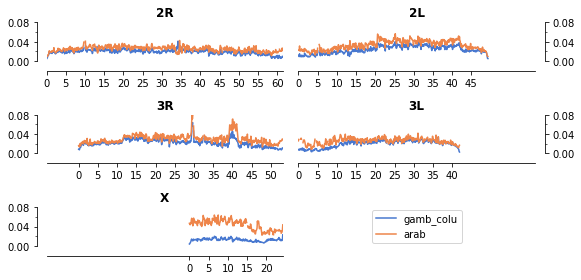

In [10]:
g = GenomeFigure(genome, figsize=(8, 4))
g.apply(plot_genome_line, df=nonref, species=["gamb_colu", "arab"], maxv=0.08)

## Plot fraction of sites that are segregating

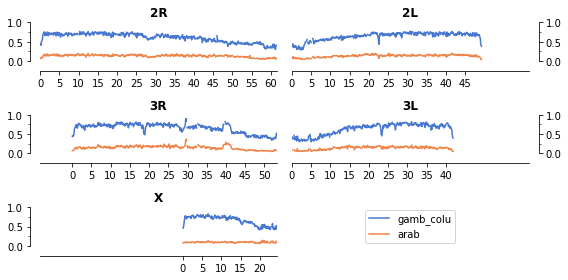

In [16]:
g = GenomeFigure(genome, figsize=(8, 4))
g.apply(plot_genome_line, df=segsites, species=["gamb_colu", "arab"], maxv=1.0)